In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

### 3 юнит

Предобработка данных

In [3]:
covid_data = pd.read_csv('data/covid_data.csv')
covid_data.head(3)

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0


In [4]:
vaccination_data = pd.read_csv('data/country_vaccinations.csv')
vaccination_data = vaccination_data[
    ['country', 'date', 'total_vaccinations',
     'people_vaccinated', 'total_vaccinations_per_hundred',
     'people_fully_vaccinated','people_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]
vaccination_data.head(3)

,country,date,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [5]:
# Группируем данные по дате и стране,
# суммируя подтвержденные случаи, смерти и выздоровления
covid_data = covid_data.groupby(
    ['date', 'country'], as_index=False
    )[['confirmed', 'deaths', 'recovered']].sum()

covid_data.head(3)

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0


In [6]:
# Преобразуем столбец 'date' в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [7]:
# Вычисляем количество активных случаев
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] \
                       - covid_data['recovered']

In [8]:
# Сортируем данные по стране и дате
covid_data = covid_data.sort_values(by=['country', 'date'])

# Вычисляем ежедневные изменения для подтвержденных случаев, смертей и выздоровлений
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('deaths')['confirmed'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

covid_data.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
# Преобразуем столбец 'date' в формат datetime
vaccination_data['date'] = pd.to_datetime(vaccination_data['date'])
vaccination_data.head(3)

,country,date,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [10]:
# Задание 3.1

# Определяем первый и последний дни в наборе данных
covid_data['date'].agg(['min', 'max'])

min   2020-01-22
max   2021-05-29
Name: date, dtype: datetime64[ns]

In [11]:
# Задание 3.2

# Определяем первый и последний дни в наборе данных
vaccination_data['date'].agg(['min', 'max'])

min   2020-12-02
max   2021-09-06
Name: date, dtype: datetime64[ns]

In [12]:
# Задание 3.3

# Объединяем два датафрейма по столбцам 'date' и 'country'
covid_df = covid_data.merge(
    vaccination_data,
    on=['date', 'country'], how='left')

# Проверяем размер объединенного датафрейма
print(covid_df.shape)
covid_df.head(3)

(86785, 16)


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Задание 3.4

# Создаем признаки общей процентной смертности и 
# общий процент случаев выздоровления
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

mask = covid_df['country'] == 'United States'
print(f'Макс. летальность в США за весь период: {covid_df[mask]['death_rate'].max():.2f}')

Макс. летальность в США за весь период: 7.19


In [14]:
# Задание 3.5

mask = covid_df['country'] == 'Russia'
print(f'Средний процент выздоровевших в России: {covid_df[mask]['recover_rate'].mean():.2f}')

Средний процент выздоровевших в России: 67.06


In [15]:
# Сохраняем объединенный датафрейм в файл CSV
covid_df.to_csv('data/covid_df.csv', index=False)

### 4 юнит

In [16]:
covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


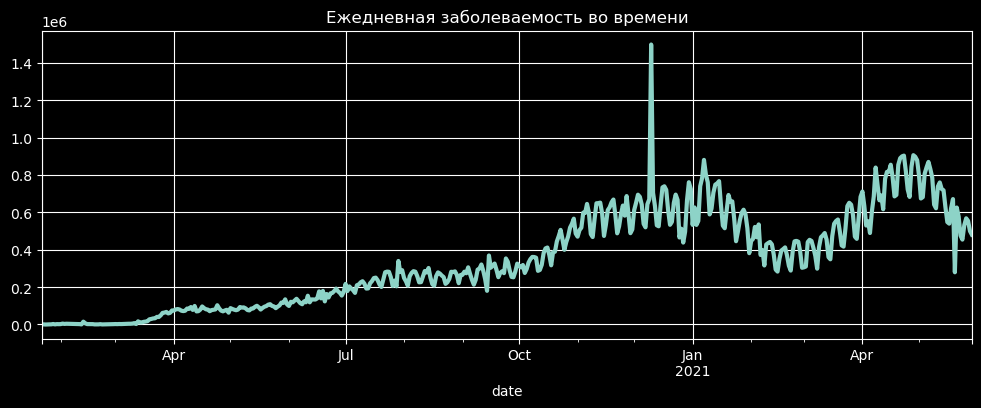

In [17]:
# Сгруппируем данные по дате, суммируя ежедневные подтвержденные случаи
# и построим линейный график
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3)

plt.show()

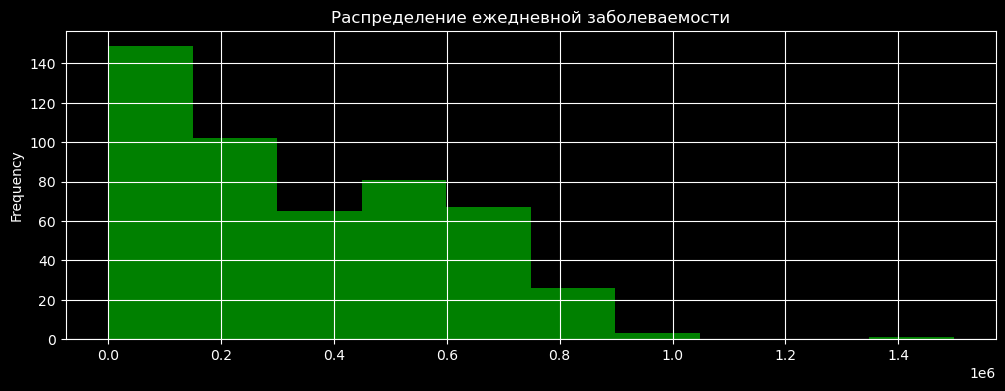

In [18]:
# Построим гистограмму распределения ежедневной заболеваемости
grouped_cases.plot(
    kind='hist',
    figsize=(12, 4),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='green',
    bins=10)

plt.show()

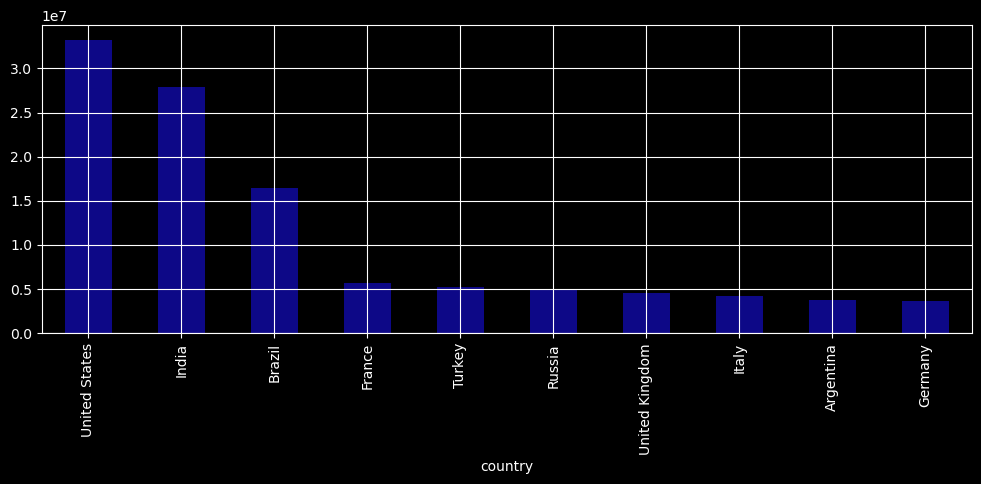

In [19]:
# Сгруппируем данные по странам, и вычислим последний зафиксированный показатель
grouped_country = covid_df.groupby('country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)

# Построим столбчатую диаграмму для 10 стран с наибольшим числом подтвержденных случаев
grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True,
    colormap='plasma')

plt.show()

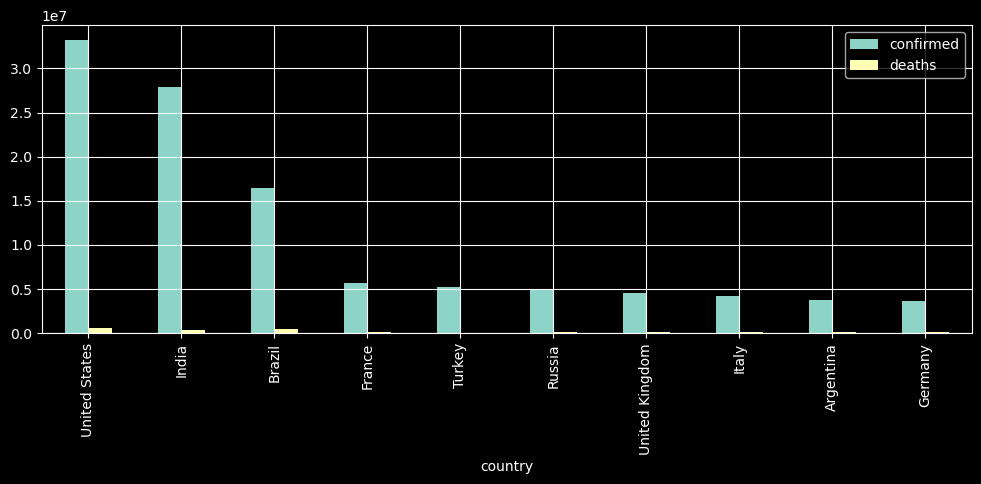

In [20]:
# Построим столбчатую диаграмму для 10 стран с наибольшим числом подтвержденных случаев и смертей
# Возьмем последние значения по странам и отсортируем по числу подтвержденных случаев
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns='confirmed')

grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True)

plt.show()

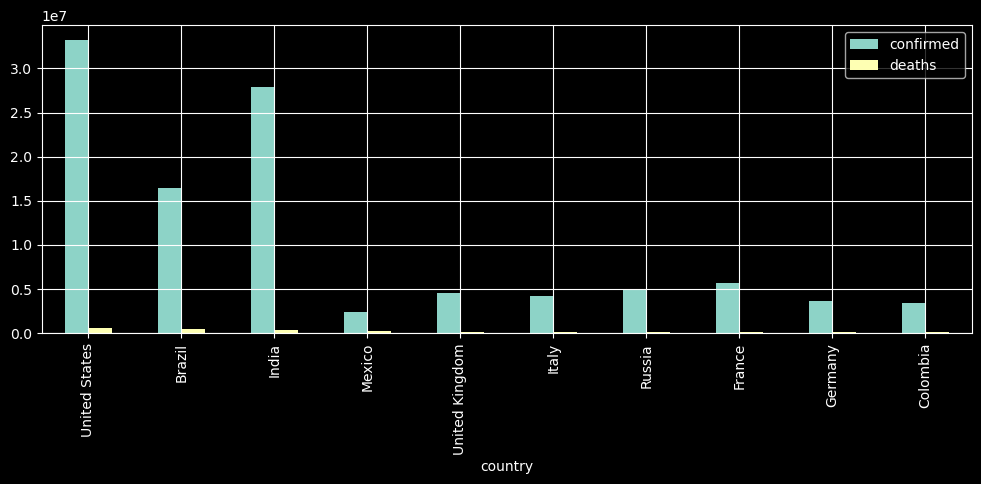

In [21]:
# Построим столбчатую диаграмму для 10 стран с наибольшим числом подтвержденных случаев и смертей
# Возьмем последние значения по странам и отсортируем по числу смертей
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns='deaths')

grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True)

plt.show()

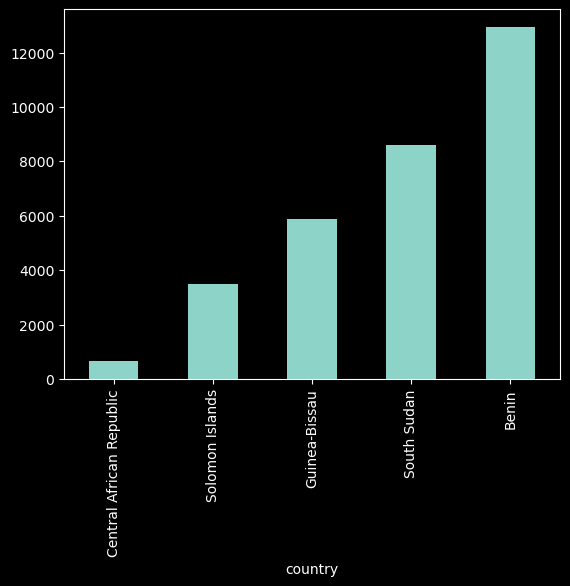

In [22]:
#  Задание 4.4

# Построим диаграмму для 5 стран с наименьшим общим числом вакцинаций
# на последний день рассматриваемого периода
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar')
plt.show()

### 5 юнит

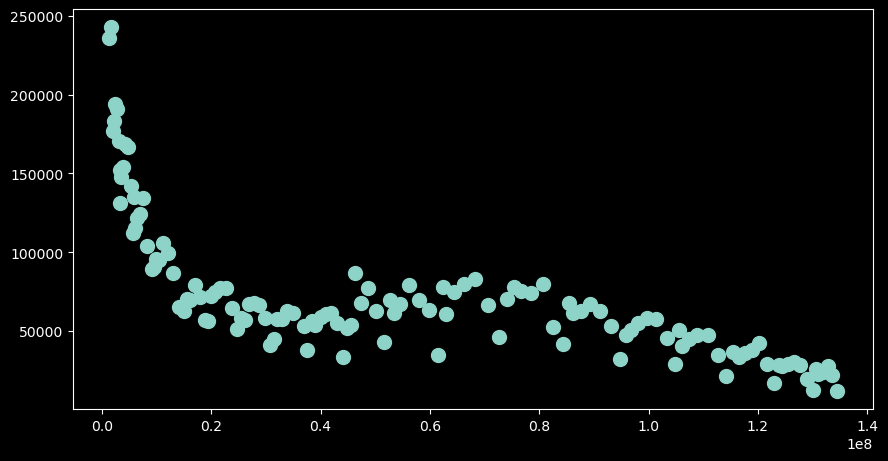

In [23]:
# Создаем фигуру и оси
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Фильтруем данные для США
us_data = covid_df[covid_df['country'] == 'United States']

# Строим диаграмму рассеяния
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100)

plt.show()

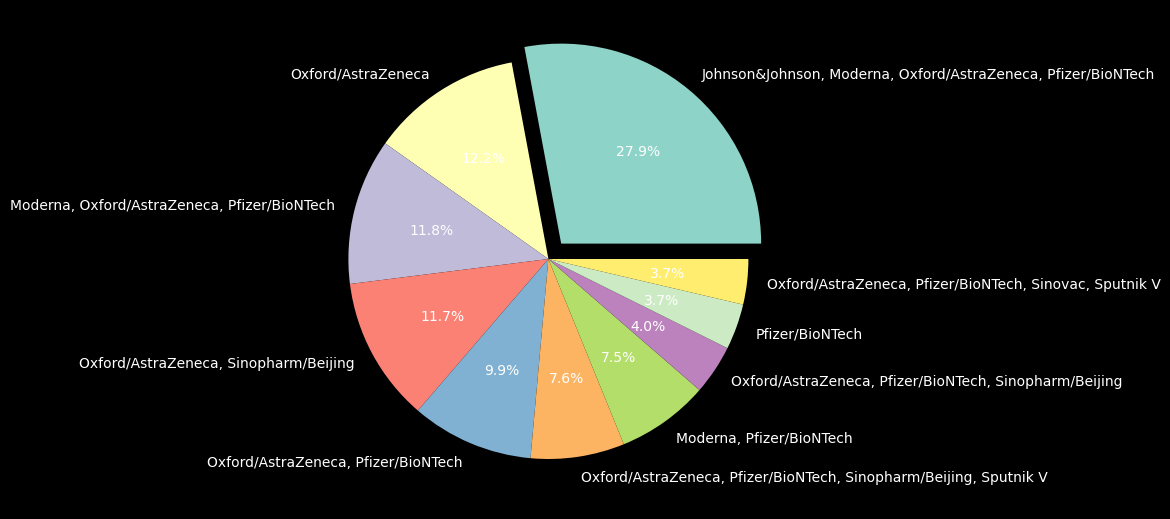

In [24]:
# Находим топ-10 комбинаций вакцин, используемых в разных странах
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]

# Строим круговую диаграмму для топ-10 комбинаций вакцин
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    x=vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

plt.show()

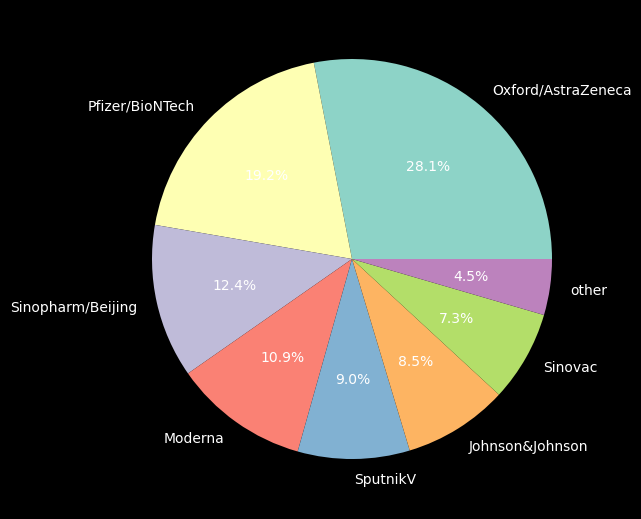

In [25]:
# Фильтруем данные, исключая записи с пропусками в столбце 'vaccines'
combination_not_na = covid_df.dropna(subset='vaccines')

# Группируем по странам и находим последнюю использованную комбинацию вакцин
combination_last = combination_not_na.groupby('country')['vaccines'].last()

# Удаляем пробелы и разбиваем строки по запятым
combination_last = combination_last.str.replace(' ', '').str.split(',')

# Превращаем списки в строки и считаем количество уникальных значений
combination_last = combination_last.explode().value_counts()

# Оставляем топ-7 комбинаций, а остальные объединяем в категорию 'other'
combination_top = combination_last[:7]
combination_top['other'] = combination_last[7:].sum()

# Строим круговую диаграмму для топ-8
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    x=combination_top,
    labels=combination_top.index,
    autopct='%.1f%%')
plt.show()

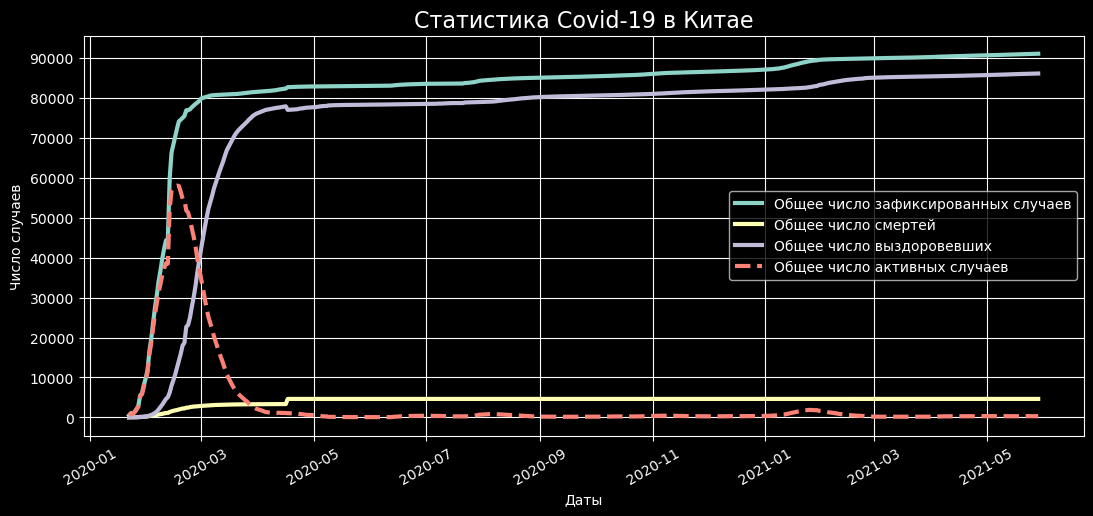

In [45]:
# Фильтруем данные для Китая и считем суммарные показатели по нескольким столбцам по датам
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby('date')[['confirmed', 'deaths', 'recovered', 'active']].sum()

# Визуализируем графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

# Установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100_000, 10_000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()

plt.show()

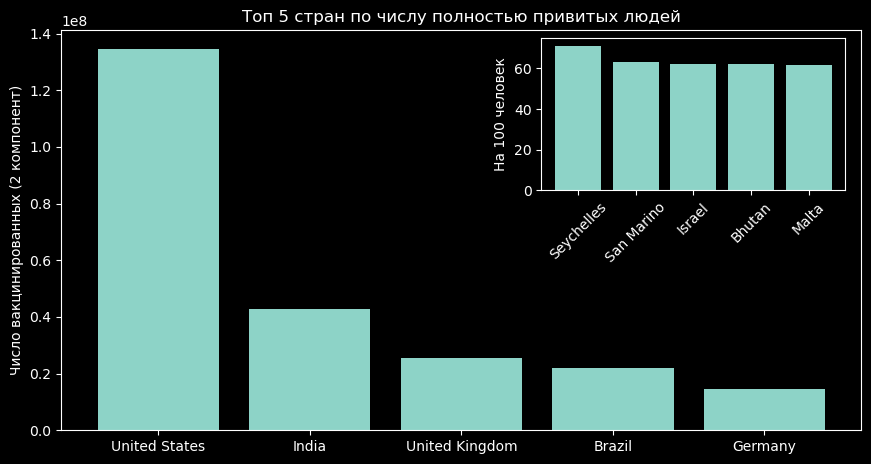

In [62]:
# Группируем данные по странам и находим топ-5 стран по числу полностью вакцинированных людей
vac_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vac_country_per_hundred = covid_df.groupby('country')['people_vaccinated_per_hundred'].last().nlargest(5)

# Визуализация главного графика
fig = plt.figure(figsize=(8, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x=vac_country.index, height=vac_country)
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

# Визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=vac_country_per_hundred.index, height=vac_country_per_hundred)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

plt.show()

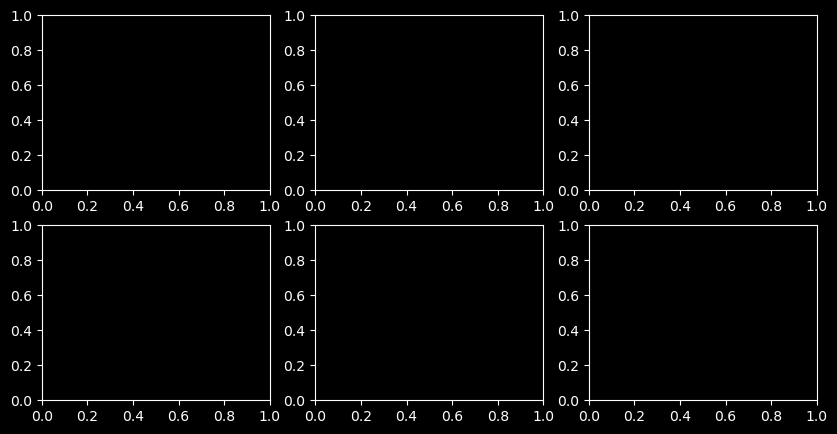

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
plt.show()

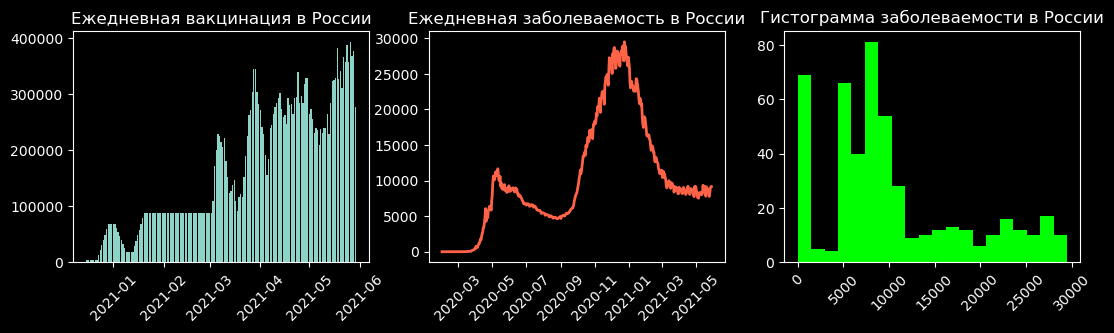

In [ ]:
# Фильтруем данные для России
russia_data = covid_df[covid_df['country'] == 'Russia']

# Визуализируем три графика в одной строке
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 3))

# График 1: Ежедневная вакцинация в России
axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'])
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

# График 2: Ежедневная заболеваемость в России
axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    color='tomato',
    lw=2)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

# График 3: Гистограмма заболеваемости в России
axes[2].hist(
    russia_data['daily_confirmed'],
    bins=20,
    color='lime')
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=45)

plt.show()